In [1]:
from percdl_federated.__init__ import *
from data import *
import jax.numpy as jnp


In [2]:
N = 500
S = 3
n = 3
L = 50
K = 2
D = 3
W = 10
n_steps = 200
step_size = 1e-3

In [6]:
function = TransformationFunction(L,D,W)

Phi_init = np.random.randn(K, L)

# 2. Normalize them right away to be safe (optional but good practice)
Phi_init = Phi_init / np.linalg.norm(Phi_init, axis=1, keepdims=True)

# ToyData uses 'f' to create realistic synthetic signals based on your model
toy = ToyData(f=function, N=N, S=S, K=K, L=L, n=n, seed=0)

# X is the signal (S, N)
# Z_true and A_true are the ground truth (useful for plotting later)
X, Z_true, A_true = toy.generate()

print("generated toy data")
print(f"X shape: {X.shape}, Z_true shape: {Z_true.shape}, A_true shape: {A_true.shape}")

X_jax = jnp.array(X)

sigma squared = 0.0001
sigma squared = 0.0001
sigma squared = 0.0001
sigma squared = 0.0001
sigma squared = 0.0001
sigma squared = 0.0001
generated toy data
X shape: (3, 500), Z_true shape: (3, 2, 451), A_true shape: (3, 2, 30)


initialized PercDL
Initial estimates:
sigma squared = 0.0001
	Step: 1/200
		CSC step: 0.27s
		CDU step: 0.57s
		loss: 256.69
	Step: 2/200
		CSC step: 0.10s
		CDU step: 0.50s
		loss: 180.34
	Step: 3/200
		CSC step: 0.04s
		CDU step: 0.45s
		loss: 138.18
	Step: 4/200
		CSC step: 0.08s
		CDU step: 0.01s
		loss: 136.48
	Step: 5/200
		CSC step: 0.13s
		CDU step: 0.01s
		loss: 135.96
	Step: 6/200
		CSC step: 0.16s
		CDU step: 0.02s
		loss: 135.94
	Step: 7/200
		CSC step: 0.13s
		CDU step: 0.01s
		loss: 135.94
	Step: 8/200
		CSC step: 0.10s
		CDU step: 0.02s
		loss: 135.94
	Step: 9/200
		CSC step: 0.07s
		CDU step: 0.02s
		loss: 135.94
	Step: 10/200
		CSC step: 0.12s
		CDU step: 0.01s
		loss: 135.94
	Step: 11/200
		CSC step: 0.08s
		CDU step: 0.02s
		loss: 135.94
	Step: 12/200
		CSC step: 0.06s
		CDU step: 0.01s
		loss: 135.94
	Step: 13/200
		CSC step: 0.14s
		CDU step: 0.01s
		loss: 135.94
	Step: 14/200
		CSC step: 0.07s
		CDU step: 0.01s
		loss: 135.94
	Step: 15/200
		CSC step: 0.24s
		CDU 

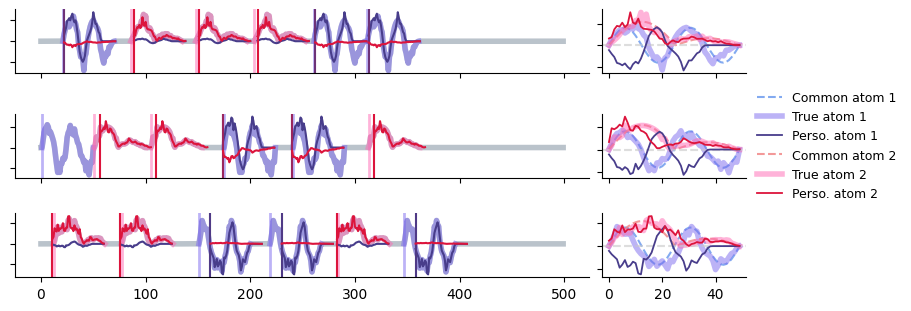

In [4]:
percdl = PerCDL(function,X_jax,K,L,n_steps=n_steps, step_size=step_size)

percdl.initialize(Phi=Phi_init)

print('initialized PercDL')

percdl.run()

percdl.plot_results(toy) # This works because you passed the 'toy' object

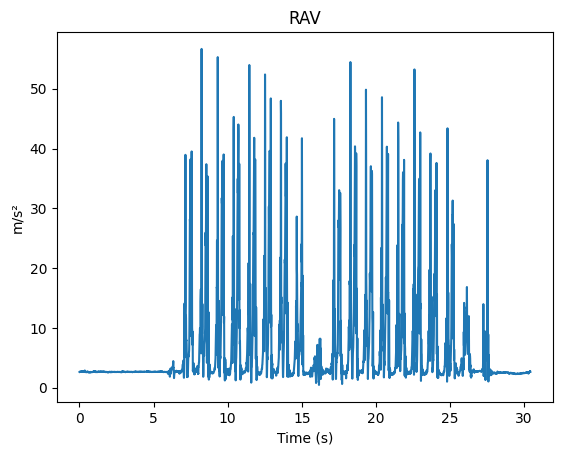

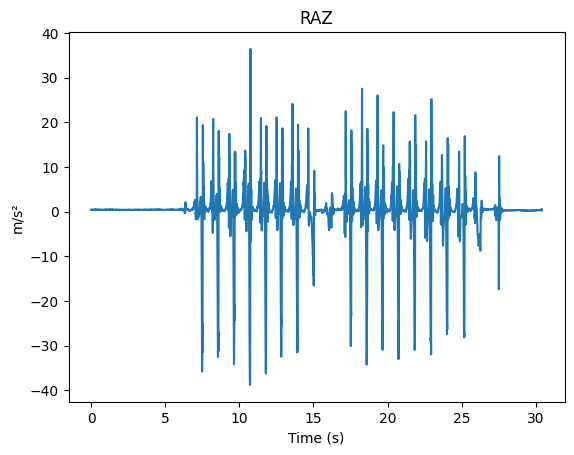

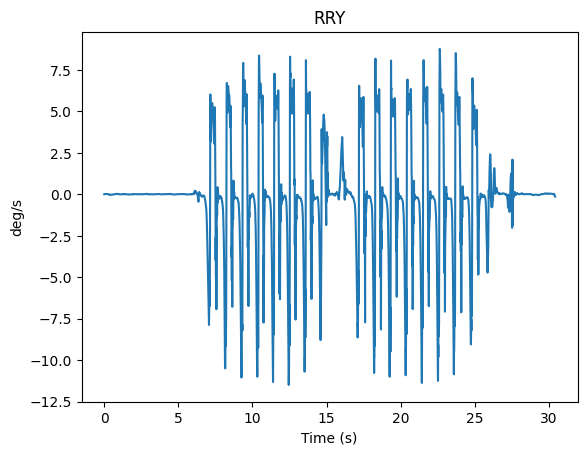

In [3]:
from data import *


subject = 5
trial = 1
metadata = load_metadata(subject, trial)
signal = load_signal(subject, trial)

#to_plot = ['TOX','TAX','TAY','RAV','RAZ','RRY','LAV','LAZ','LRY']
to_plot = ['RAV','RAZ','RRY']
show_plot_simple(signal, to_plot)


In [ ]:
subjects = list(range(1, 11))  # 10 subjects
signal_names = ['RAV','RAZ','RRY']   # select only three signals
X = build_X(subjects, signal_names, trial=1)

X = X[:,:,0]
X_numpy = X.detach().numpy()
X_jax = jnp.array(X_numpy)

In [8]:
phi_init = np.random.randn(K, L)
phi_init = phi_init / np.linalg.norm(phi_init, axis=1, keepdims=True)

In [10]:
percdl = PerCDL(function,X_jax,K,L)

percdl.initialize(Phi=phi_init)

print('initialized PercDL')

percdl.run()

initialized PercDL
Initial estimates:
sigma squared = 0.0001
	Step: 1/100
		CSC step: 0.18s
		CDU step: 0.53s
		loss: 6474.30
	Step: 2/100
		CSC step: 0.07s
		CDU step: 0.39s
		loss: 3394.22
	Step: 3/100
		CSC step: 0.14s
		CDU step: 0.63s
		loss: 3351.55
	Step: 4/100
		CSC step: 0.13s
		CDU step: 0.39s
		loss: 3588.33
	Step: 5/100
		CSC step: 0.13s
		CDU step: 0.45s
		loss: 3581.87
	Step: 6/100
		CSC step: 0.08s
		CDU step: 0.41s
		loss: 3535.30
	Step: 7/100
		CSC step: 0.07s
		CDU step: 0.01s
		loss: 3532.44
	Step: 8/100
		CSC step: 0.08s
		CDU step: 0.01s
		loss: 3533.22
	Step: 9/100
		CSC step: 0.11s
		CDU step: 0.02s
		loss: 3533.22
	Step: 10/100
		CSC step: 0.11s
		CDU step: 0.10s
		loss: 3533.22
	Step: 11/100
		CSC step: 0.10s
		CDU step: 0.01s
		loss: 3533.22
	Step: 12/100
		CSC step: 0.18s
		CDU step: 0.03s
		loss: 3533.22
	Step: 13/100
		CSC step: 0.11s
		CDU step: 0.03s
		loss: 3533.22
	Step: 14/100
		CSC step: 0.15s
		CDU step: 0.02s
		loss: 3533.22
	Step: 15/100
		CSC step

In [ ]:
z = percdl.Z
a = percdl.A
phi = percdl.Phi

In [21]:
import plot
import importlib
importlib.reload(plot)
from plot import *

In [19]:
a_tensor.shape

torch.Size([10, 2, 30])


  FULL TIME-WARPING ANALYSIS - Subject 0 of 10

--- Reconstruction Metrics (Subject 0) ---

 MSE per Channel (Comparison):
  Channel 0: Original=3.2250e-01, Warped=3.1554e-01
  Channel 1: Original=3.2250e-01, Warped=3.1554e-01
  Channel 2: Original=3.2250e-01, Warped=3.1554e-01

 Global MSE:
  Global MSE (Original Φ): 3.2250e-01
  Global MSE (Time-Warped Φ): 3.1554e-01
  Error Reduction Gain: 2.16 %

--- Reconstruction Visualization (Subject 0) ---


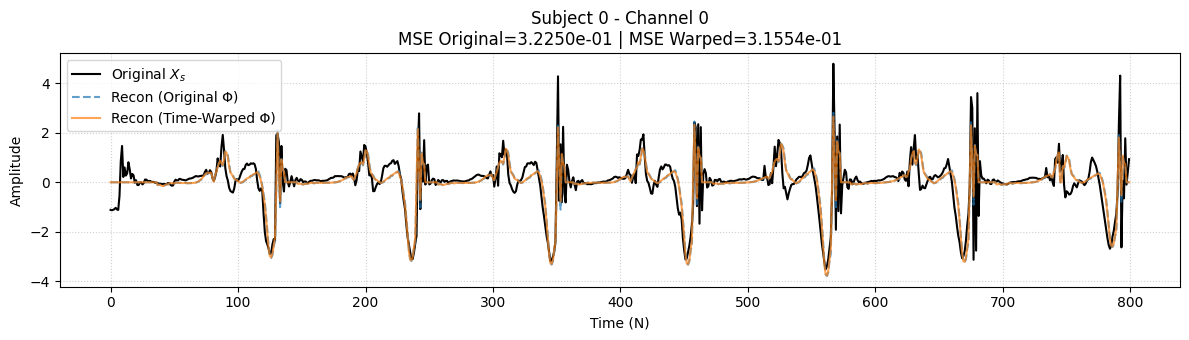

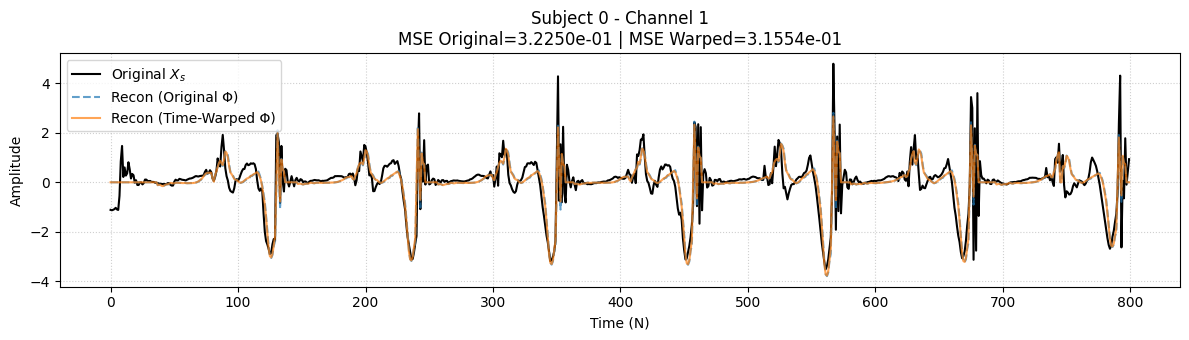

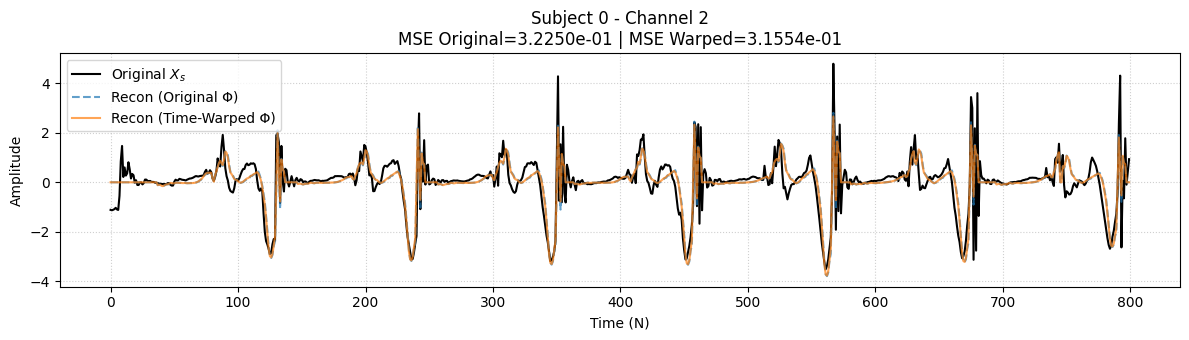


--- MSE Comparison Barplot (Subject 0) ---


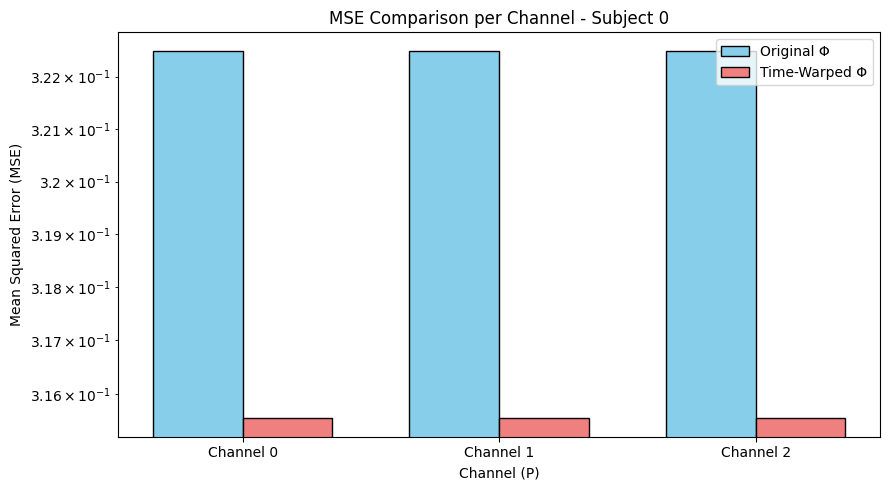


--- General vs. Personalized Atoms (Subject 0) ---


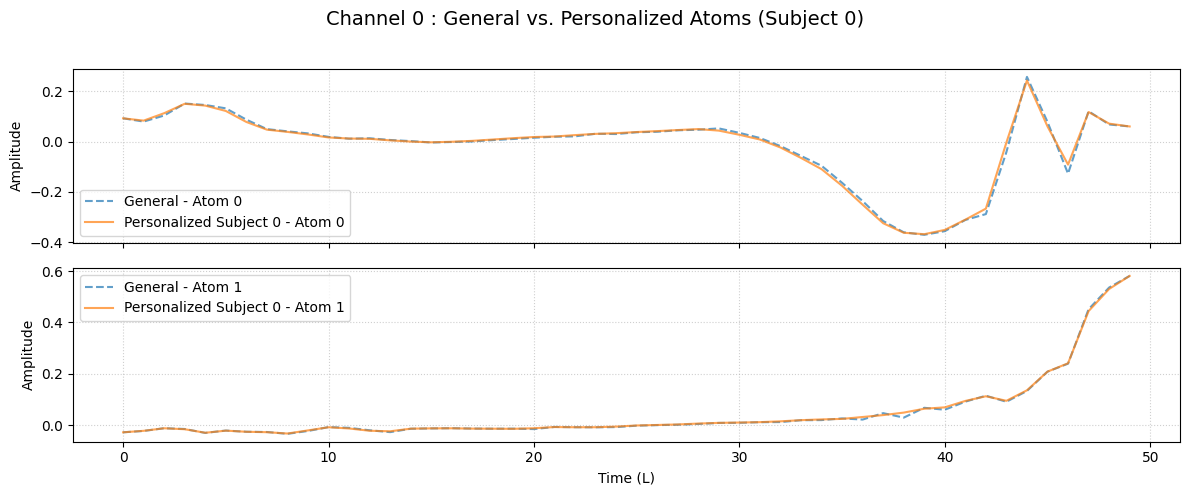

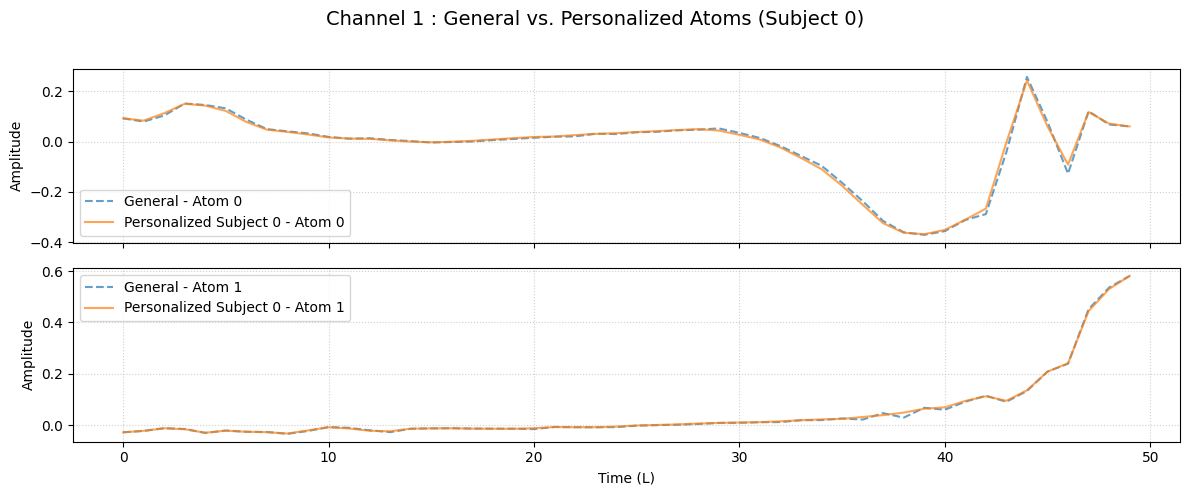

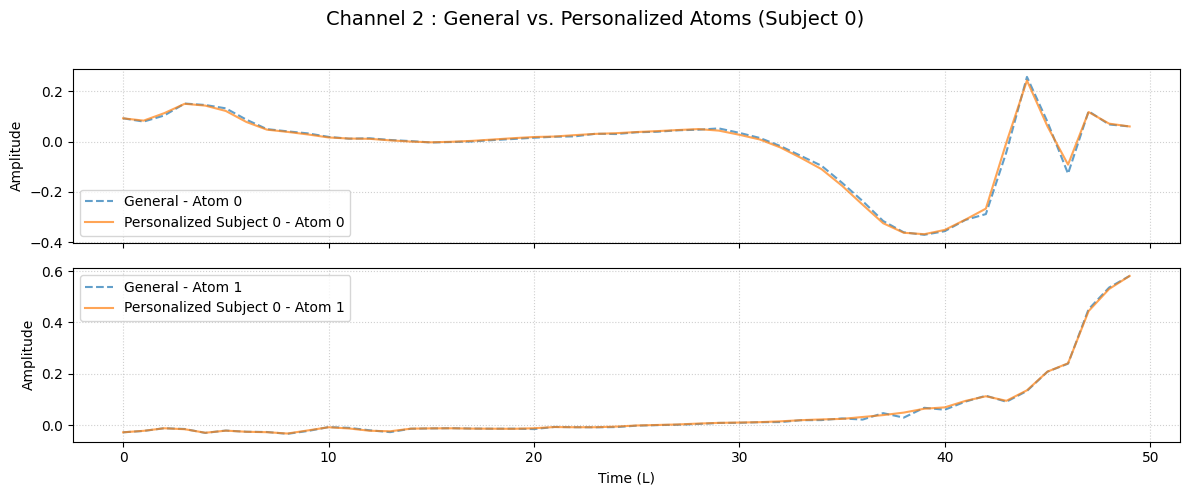

In [22]:
z_tensor = torch.tensor(np.array(z))
a_tensor = torch.tensor(np.array(a))
phi_tensor = torch.tensor(np.array(phi))

X3 = X.unsqueeze(-1).repeat(1, 1, 3)  # shape: S x N x 3
phi3 = phi_tensor.unsqueeze(-1).repeat(1, 1, 3)  # shape: K x L x 3


full_warping_analysis(X3,z_tensor,phi3,a_tensor)